## HW8
### 휴먼지능정보공학과 201910803 박채희

 the Lady Chapel at St Albans Cathedral의 소리이다.

In [5]:
from thinkdsp import read_wave
from thinkdsp import decorate

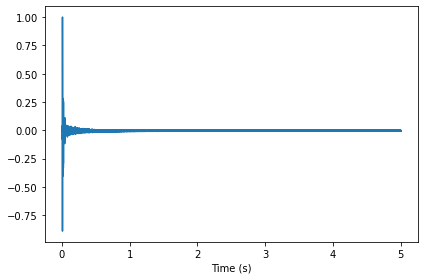

In [21]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [22]:
response.make_audio()

DFT of the impulse response 를 transfer function을 이용해서 만든다.

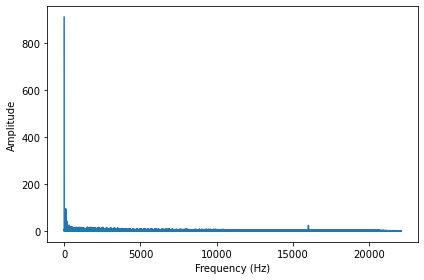

In [23]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

log-log scale 로 보기

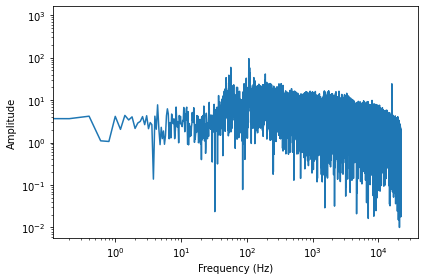

In [24]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

이전에 사용했던 violin.wav사용

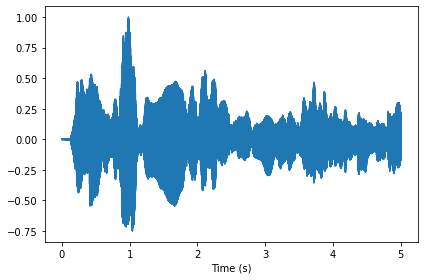

In [12]:
wave = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [13]:
wave.make_audio()

In [25]:
spectrum = wave.make_spectrum()

In [26]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [27]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [28]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

### frequency domain과 transform back to the time domain 의 곱 :DFT를 이용

In [36]:
output = (spectrum * transfer).make_wave()
output.normalize()

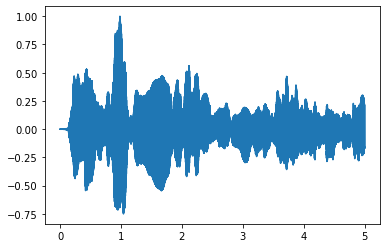

In [30]:
wave.plot()

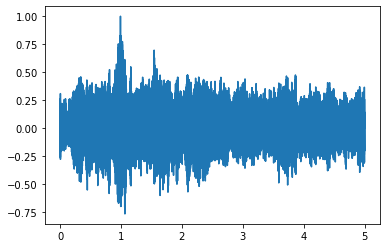

In [31]:
output.plot()

In [32]:
output.make_audio()

### convolve 메소드를 이용

In [33]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()